<a href="https://colab.research.google.com/github/sreeja2208/sreeja-assessment-25062024/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP**

In [ ]:
import pandas as pd

In [ ]:
s = ["Congrats. You have won lottery and you can get lottery money by calling lottery number",
     "give your bank details for lottery money",
     "lottery for sure if bank details are verified"]

In [ ]:
s[0]

'Congrats. You have won lottery and you can get lottery money by calling lottery number'

In [ ]:
type(s)

list

In [ ]:
#TOKENIZATION

In [ ]:
s[0].split()

['Congrats.',
 'You',
 'have',
 'won',
 'lottery',
 'and',
 'you',
 'can',
 'get',
 'lottery',
 'money',
 'by',
 'calling',
 'lottery',
 'number']

In [ ]:
s[1].split()

['give', 'your', 'bank', 'details', 'for', 'lottery', 'money']

In [ ]:
s[2].split()

['lottery', 'for', 'sure', 'if', 'bank', 'details', 'are', 'verified']

In [ ]:
#COUNT VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(stop_words = 'english')  #search for the stop words and then remove them from the sentence
op = vect.fit_transform(s).toarray()
op
#we have applied the count vectorizer and it is giving us a document matrix

array([[0, 1, 1, 0, 3, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]])

In [ ]:
import pandas as pd
df = pd.DataFrame(op,columns = vect.get_feature_names()) #prints the feature names selected from the document matrix
df #prints a dataframe showing how many times each unique value is repeated(countvectorizer)

,bank,calling,congrats,details,lottery,money,number,sure,verified,won
0,0,1,1,0,3,1,1,0,0,1
1,1,0,0,1,1,1,0,0,0,0
2,1,0,0,1,1,0,0,1,1,0


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
ls

MyDrive/


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
ls

In [ ]:
cd /content/drive/MyDrive/Webinars/Python Sept batch/ML

/content/drive/MyDrive/Webinars/Python Sept batch/ML


In [ ]:
ls

'ai_ml - Copy.pdf'   forecasting.ipynb   multilinear.ipynb   simpleLinear.ipynb
 clustering.ipynb    knn-iris.ipynb      nlp.ipynb
 datasets/           logistic.ipynb      nlp.pdf


In [ ]:
import pandas as pd
#SPAM HAM
df = pd.read_csv('https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.corr()['punct']

length    0.6431
punct     1.0000
Name: punct, dtype: float64

In [ ]:
df.shape

(5572, 4)

ham     4825
spam     747
Name: label, dtype: int64

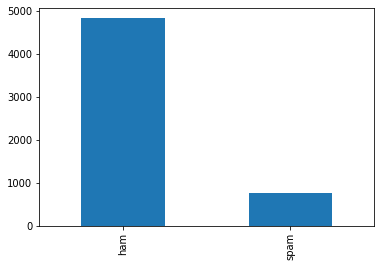

In [ ]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar')
df['label'].value_counts()

In [ ]:
df['message'][1250]

"I call you later, don't have network. If urgnt, sms me."

In [ ]:
df['message'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [ ]:
x = df['message'].values #inputs
y = df['label'].values   #outputs

In [ ]:
#do train test and split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(4179,)

In [ ]:
x_test.shape

(1393,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#apply the count vectorizer
vect = CountVectorizer(stop_words ='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
#SUPPORT VECTOR MACHINE CLASSIFIER
from sklearn.svm import SVC     #use the support vector machine classifier
model = SVC()
model.fit(x_train_vect,y_train)  #fitting the model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
# model.fit(x_train_vect,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = model.predict(x_test_vect)  #predicting the model using x_test_vect

In [ ]:
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.9813352476669059

In [ ]:
test = df['message'][2001]
test

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [ ]:
df['label'][2001]  #for the statement which is there in index position 2001, the statement is ham
#lets see what our model thinks of this statement

'ham'

In [ ]:
#model is predicting that the above message is ham
test = vect.transform([df['message'][2001]])
model.predict(test)

array(['ham'], dtype=object)

In [ ]:
#METHOD 2
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)

y_pred1 = text_model.predict(x_test)
y_pred1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
text_model.predict([df['message'][2]])

array(['spam'], dtype=object)

In [ ]:
text_model.predict(['Free entry in 2 a wkly comp to win FA Cup'])

array(['ham'], dtype=object)

In [ ]:
# pickle(ml models,pipelines)
# joblib(pipelines,ml models)
# model.save(dl models)

In [ ]:
#joblib model saving
import joblib  #save your pipeline model
joblib.dump(text_model,'spam-ham')

['spam-ham']

In [ ]:
#write these lines when you want to use this model in some other file
#you should upload the spam-ham file there
import joblib   #loads the model back
text_model1 = joblib.load('spam-ham')

In [ ]:
op = text_model1.predict(['how are you']) #this can be used in any other notebook or file
op

array(['ham'], dtype=object)

In [ ]:
#STREAMLIT APP FOR NLP

In [ ]:
import joblib
text_model = joblib.load('spam-ham')

In [ ]:
!pip install streamlit --quiet

     |████████████████████████████████| 8.3 MB 8.4 MB/s 
     |████████████████████████████████| 180 kB 43.5 MB/s 
     |████████████████████████████████| 76 kB 5.8 MB/s 
     |████████████████████████████████| 111 kB 74.8 MB/s 
     |████████████████████████████████| 4.3 MB 43.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 124 kB 58.6 MB/s 
     |████████████████████████████████| 788 kB 52.0 MB/s 
     |████████████████████████████████| 374 kB 63.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.21 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.4.2 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.28.0 which is incompatibl

In [ ]:
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15984 sha256=67feb76005378154183dab2d88b1f4de8c031547361ec114301061c188906e49
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
st.title("SPAM HAM CLASSIFICATION")
text_model = joblib.load('spam-ham')
ip = st.text_input('Enter your message:')
op = text_model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


'http://280a-34-125-61-162.ngrok.io'

In [ ]:
#PICKLE MODEL SAVING
import pickle
pickle.dump(text_model,open('spam-ham.pkl','wb')) #writebyte #serialization

In [ ]:
reload_model = pickle.load(open('spam-ham.pkl','rb')) #readbyte  #deserialization

In [ ]:
reload_model.predict([df['message'][2]]) #predicting the output using pickle model

array(['spam'], dtype=object)

In [ ]:
import nltk
nltk.download('stopwords') #stopwords download
nltk.download('punkt') #tokenizer download
nltk.download('wordnet') #lemmatizer download

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Stemming
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

list1 = []

x = "He was running and eating at the same time. He has a bad habit of swimming after playing long hours continously"
review = re.sub('[^a-zA-Z]',' ',x) #if we come across any statement other than a-z lowercase and A-Z uppercase, replace with a space
review = review.lower()
review = review.split()

review_stem = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
review_stem = ' '.join(review_stem) #join the text with the sentence
list1.append(review_stem)

In [ ]:
list1
#stemming - flying - fly, lovely - love, playing - play

['run eat time bad habit swim play long hour contin']

In [ ]:
#lemmatization - refers more to the context of the sentence
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

list2 = []

x = "He was running and eating at the same time. He has a bad habit of swimming after playing long hours continously"
review = re.sub('[^a-zA-Z]',' ',x) #if we come across any statement other than a-z lowercase and A-Z uppercase, replace with a space
review = review.lower()
review = review.split()

review_stem = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
review_stem = ' '.join(review_stem) #join the text with the sentence
list2.append(review_stem)

In [ ]:
list2

['running eating time bad habit swimming playing long hour continously']